# <center><div style="font-family: Trebuchet MS; background-color: #AED6F2; color: #3498DB; padding: 12px; line-height: 1;">Cell2Cell Duke University Telco Dataset Analysis</div></center>

#### <center> Kwok Sze Ming [22022177D]</center>
- Dataset Link: https://www.kaggle.com/datasets/geoamins/cell2cell-duke-university-telco-dataset


<center>
    <img src="https://media.licdn.com/dms/image/D4D12AQHehFjrFpLb-A/article-cover_image-shrink_720_1280/0/1692565495463?e=1717632000&v=beta&t=N1y1bjgVJB1of4dSQd67M0DIPHTPvM1tmkpg4mLUFgY" alt="Telco" width="50%">
</center>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("C:/Users/user/Desktop/0capstone/cell2cell_duke/cell2cell_duke.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_5412\3058419429.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:/Users/user/Desktop/0capstone/cell2cell_duke/cell2cell_duke.csv")


In [3]:
data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71047 entries, 0 to 71046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 71047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             70831 non-null  float64
 3   MonthlyMinutes             70831 non-null  float64
 4   TotalRecurringCharge       70831 non-null  float64
 5   DirectorAssistedCalls      70831 non-null  float64
 6   OverageMinutes             70831 non-null  float64
 7   RoamingCalls               70831 non-null  float64
 8   PercChangeMinutes          70545 non-null  float64
 9   PercChangeRevenues         70545 non-null  float64
 10  DroppedCalls               71047 non-null  float64
 11  BlockedCalls               71047 non-null  float64
 12  UnansweredCalls            71047 non-null  float64
 13  CustomerCareCalls          71047 non-null  flo

# Get the column names with missing values

In [5]:
data.dropna(subset=['Churn'], inplace=True)
columns_with_missing_values = data.columns[data.isna().any()].tolist()

print(columns_with_missing_values)

['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2']


In [6]:
from sklearn.impute import SimpleImputer
original_values = data.copy()

# Numeric columns for mean imputation
numeric_columns = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls',
                   'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
                   'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2']

# Categorical columns for mode imputation
categorical_columns = ['ServiceArea']

# Impute missing values using mean imputation for numeric columns
for column in numeric_columns:
    mean_imputer = SimpleImputer(strategy='mean')
    data[column] = mean_imputer.fit_transform(data[[column]])

# Impute missing values using mode imputation for categorical columns
for column in categorical_columns:
    mode_imputer = SimpleImputer(strategy='most_frequent')
    data[column] = mode_imputer.fit_transform(data[[column]])
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             51047 non-null  float64
 3   MonthlyMinutes             51047 non-null  float64
 4   TotalRecurringCharge       51047 non-null  float64
 5   DirectorAssistedCalls      51047 non-null  float64
 6   OverageMinutes             51047 non-null  float64
 7   RoamingCalls               51047 non-null  float64
 8   PercChangeMinutes          51047 non-null  float64
 9   PercChangeRevenues         51047 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [7]:
train_df = data.copy()

## All missing values are removed. 
### train_df: 51047 rows, 58 columns

In [8]:
print('Train data:')
print('There are' , train_df.shape[0] , 'rows')
print('There are' , train_df.shape[1] , 'columns')
print('There is' , train_df.duplicated().sum() ,'duplicated')
print('=====================================================')
print('Number of Churn:')
print(train_df['Churn'].value_counts())

Train data:
There are 51047 rows
There are 58 columns
There is 0 duplicated
Number of Churn:
No     36336
Yes    14711
Name: Churn, dtype: int64


# Yes:1, No:0

In [9]:
# Define a dictionary to map values
mapping = {'Yes': 1, 'No': 0, 'Known':1, 'Unknown': 0}

# Apply mapping to all columns
train_df = train_df.replace(mapping)

# Detect outliers

In [10]:
from scipy import stats

columns_with_outliers = {}

for column in train_df.columns:
    if train_df[column].dtype in [np.int64, np.float64]:
        # Calculate Z-scores for the numeric column
        z_scores = np.abs(stats.zscore(train_df[column]))

        # Set a threshold for the Z-score above which a data point is considered an outlier
        z_threshold = 3

        # Find the indices of outliers based on the Z-scores
        z_outlier_indices = np.where(z_scores > z_threshold)

        Q1 = train_df[column].quantile(0.25)
        Q3 = train_df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Find the indices of outliers based on the IQR
        iqr_outlier_indices = np.where((train_df[column] < (Q1 - 1.5 * IQR)) | (train_df[column] > (Q3 + 1.5 * IQR)))

        # Check if either Z-score or IQR method detected outliers
        if len(z_outlier_indices[0]) > 0 or len(iqr_outlier_indices[0]) > 0:
            total_outliers = len(z_outlier_indices[0]) + len(iqr_outlier_indices[0])
            columns_with_outliers[column] = total_outliers

sorted_columns_with_outliers = dict(sorted(columns_with_outliers.items(), key=lambda item: item[1], reverse=True))

print("Columns with outliers and the number of outliers (sorted from large to small):")
for column, num_outliers in sorted_columns_with_outliers.items():
    print(column, ":", num_outliers)

Columns with outliers and the number of outliers (sorted from large to small):
PercChangeRevenues : 14312
ChildrenInHH : 12368
HandsetWebCapable : 10002
NewCellphoneUser : 9824
TruckOwner : 9523
OwnsComputer : 9464
RoamingCalls : 9306
RVOwner : 8306
CallWaitingCalls : 8213
PercChangeMinutes : 8028
CustomerCareCalls : 7574
HandsetRefurbished : 7091
NotNewCellphoneUser : 7035
OverageMinutes : 6881
DirectorAssistedCalls : 6367
BlockedCalls : 6336
InboundCalls : 5949
NonUSTravel : 5758
Handsets : 5563
ThreewayCalls : 5189
DroppedBlockedCalls : 4819
ReferralsMadeBySubscriber : 4768
ReceivedCalls : 4708
DroppedCalls : 4699
OffPeakCallsInOut : 4658
UnansweredCalls : 4605
OutboundCalls : 4308
MonthlyRevenue : 3889
PeakCallsInOut : 3742
MonthlyMinutes : 3502
RetentionCalls : 3490
MadeCallToRetentionTeam : 3490
HandsetModels : 2738
AdjustmentsToCreditRating : 2275
UniqueSubs : 2108
CurrentEquipmentDays : 1967
MonthsInService : 1801
RetentionOffersAccepted : 1762
OptOutMailings : 1504
TotalRecurr

# Boxplots

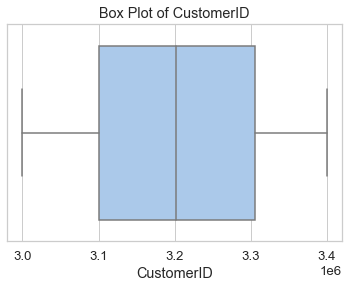

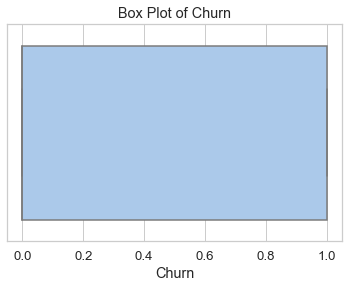

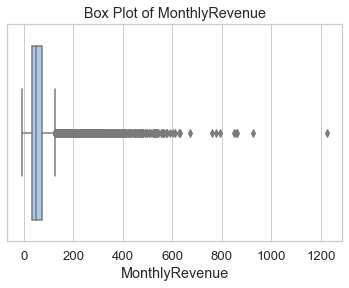

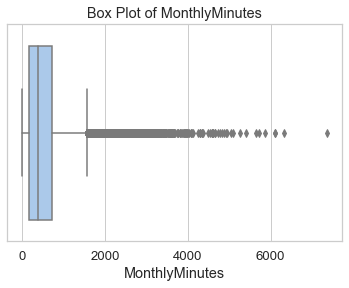

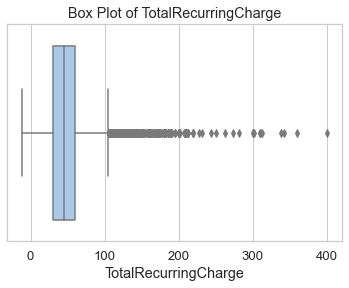

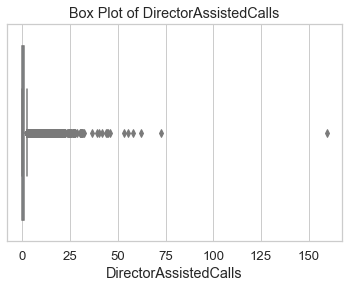

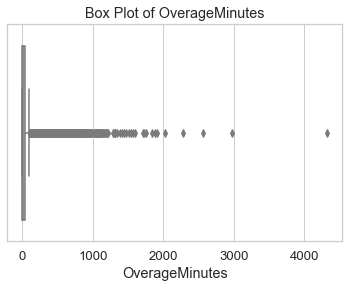

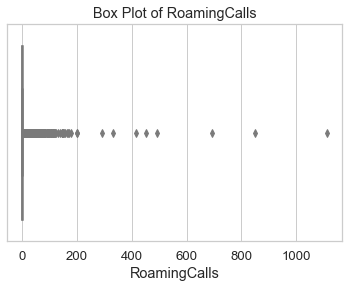

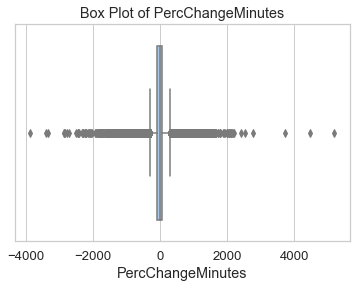

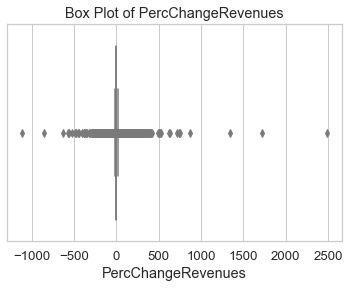

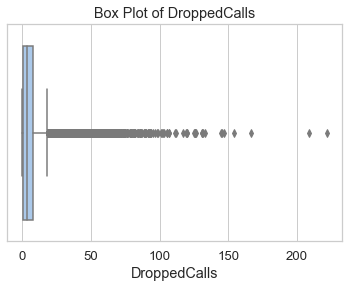

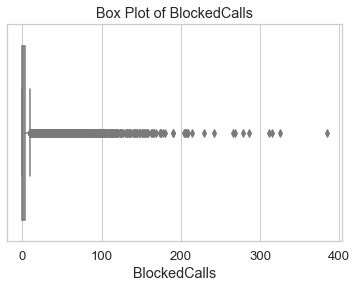

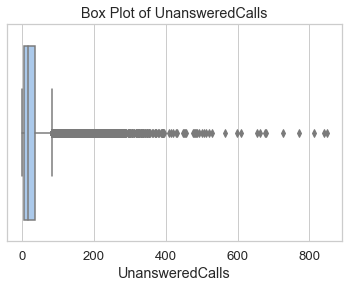

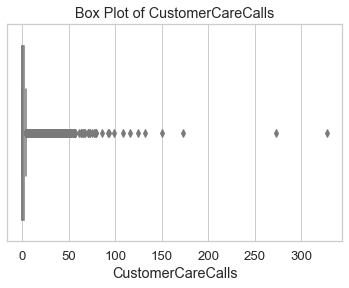

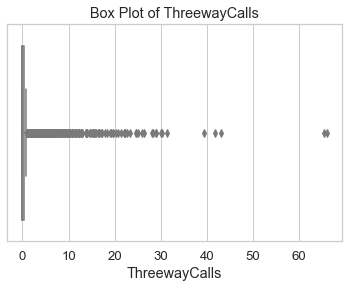

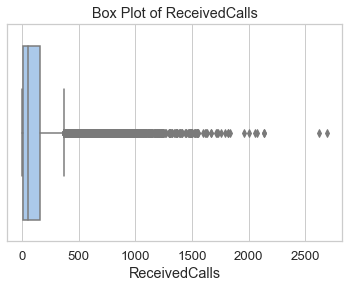

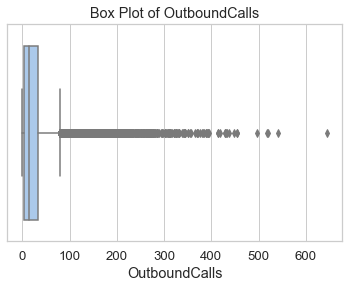

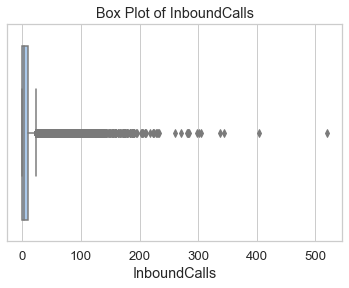

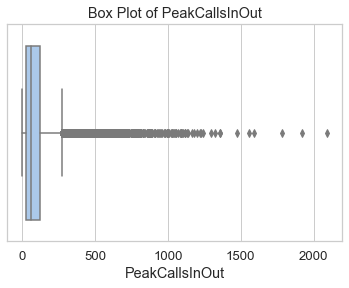

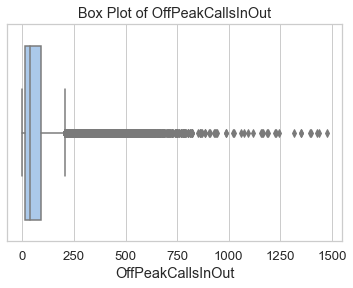

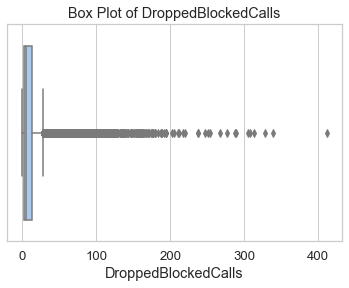

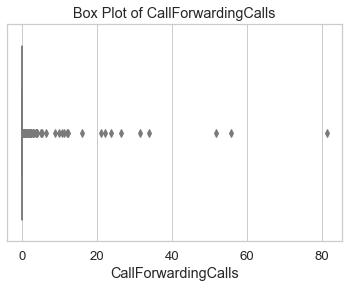

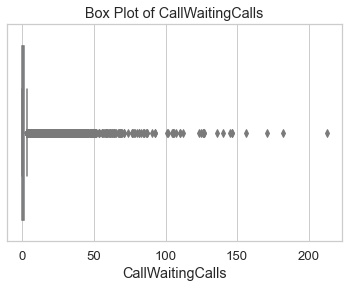

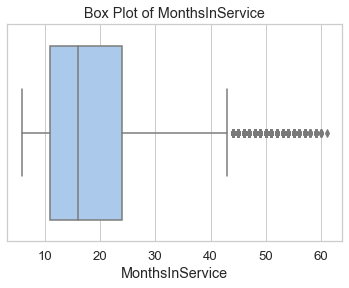

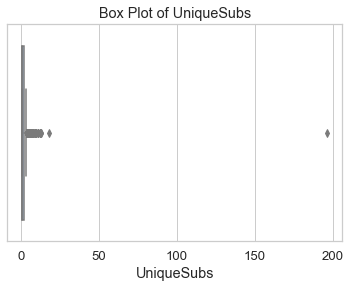

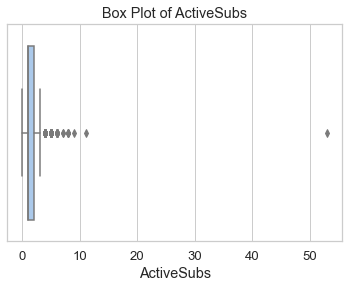

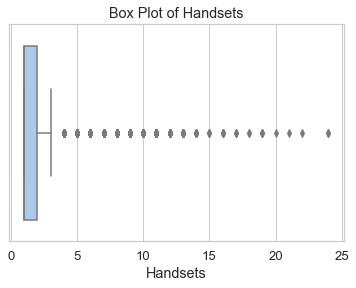

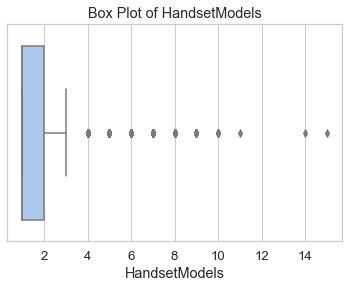

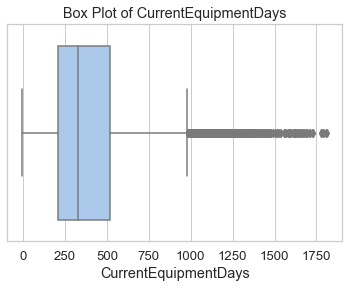

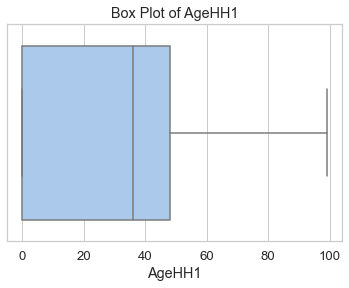

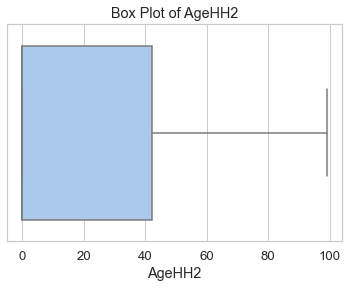

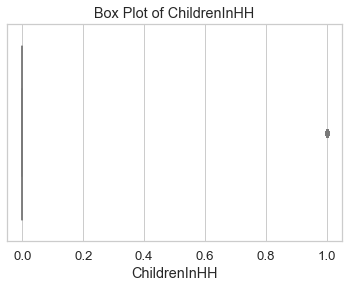

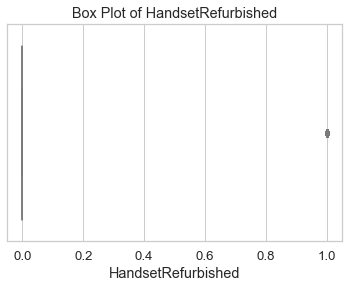

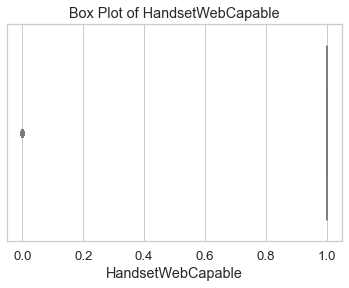

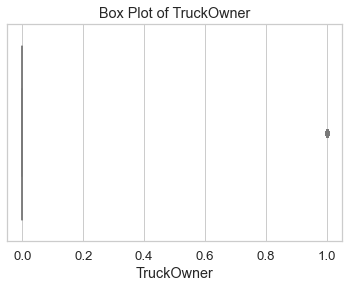

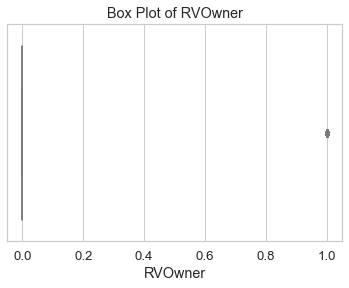

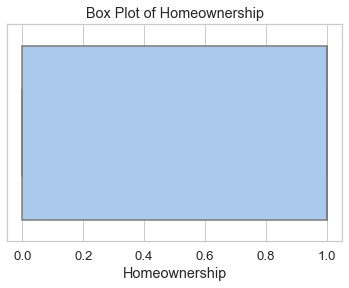

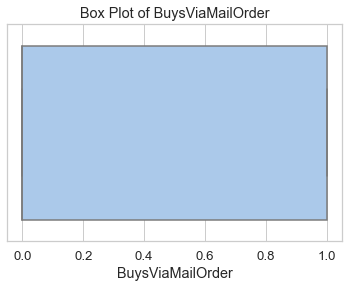

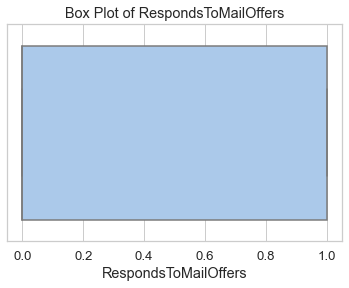

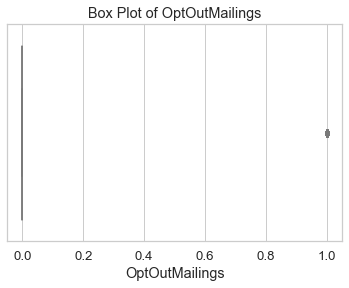

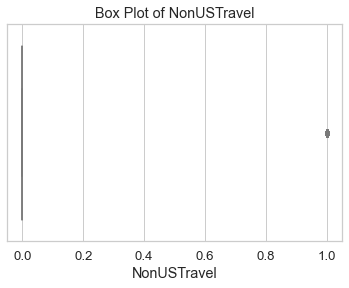

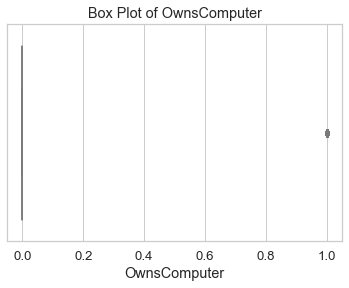

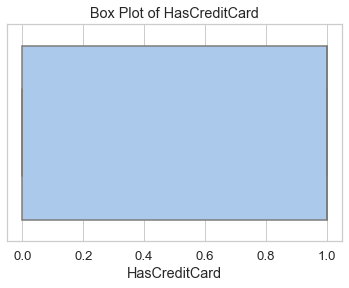

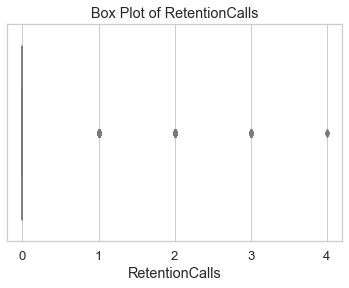

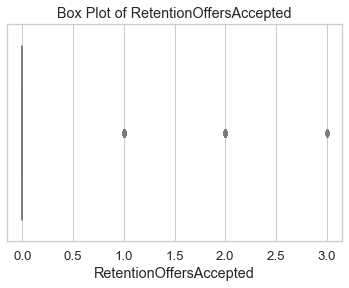

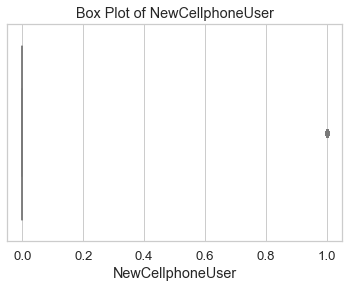

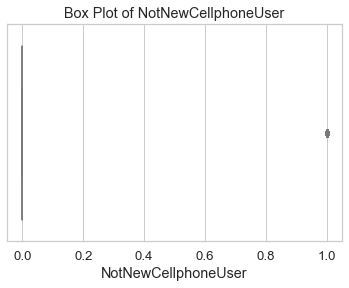

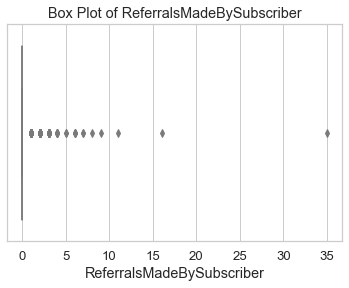

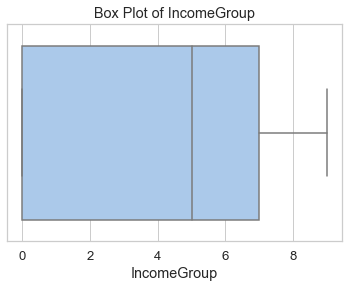

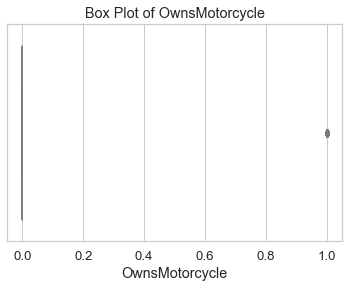

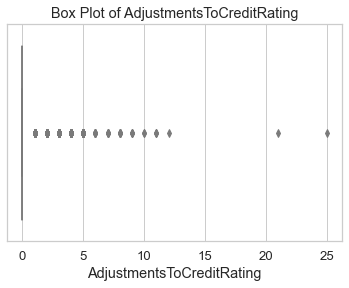

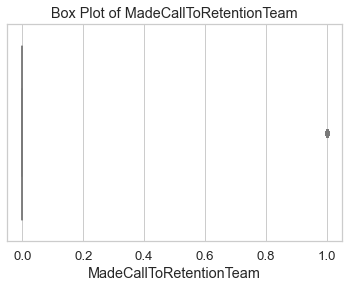

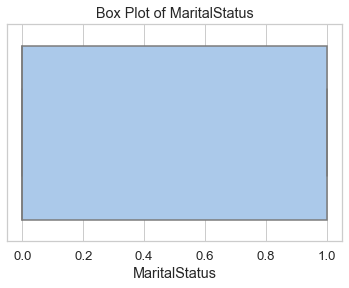

In [11]:
numeric_columns = train_df.select_dtypes(include=np.number).columns

summary_stats = train_df[numeric_columns].describe()

#Detect outliers using the interquartile range (IQR) method
q1 = summary_stats.loc['25%']
q3 = summary_stats.loc['75%']
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = (train_df[numeric_columns] < lower_bound) | (train_df[numeric_columns] > upper_bound)

# Identify columns with outliers
columns_with_outliers = outliers.any()

sns.set_palette("pastel")

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    ax = sns.boxplot(x=train_df[column], palette="pastel")
    ax.set_facecolor('white') 
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)
    plt.show()

# Heatmap

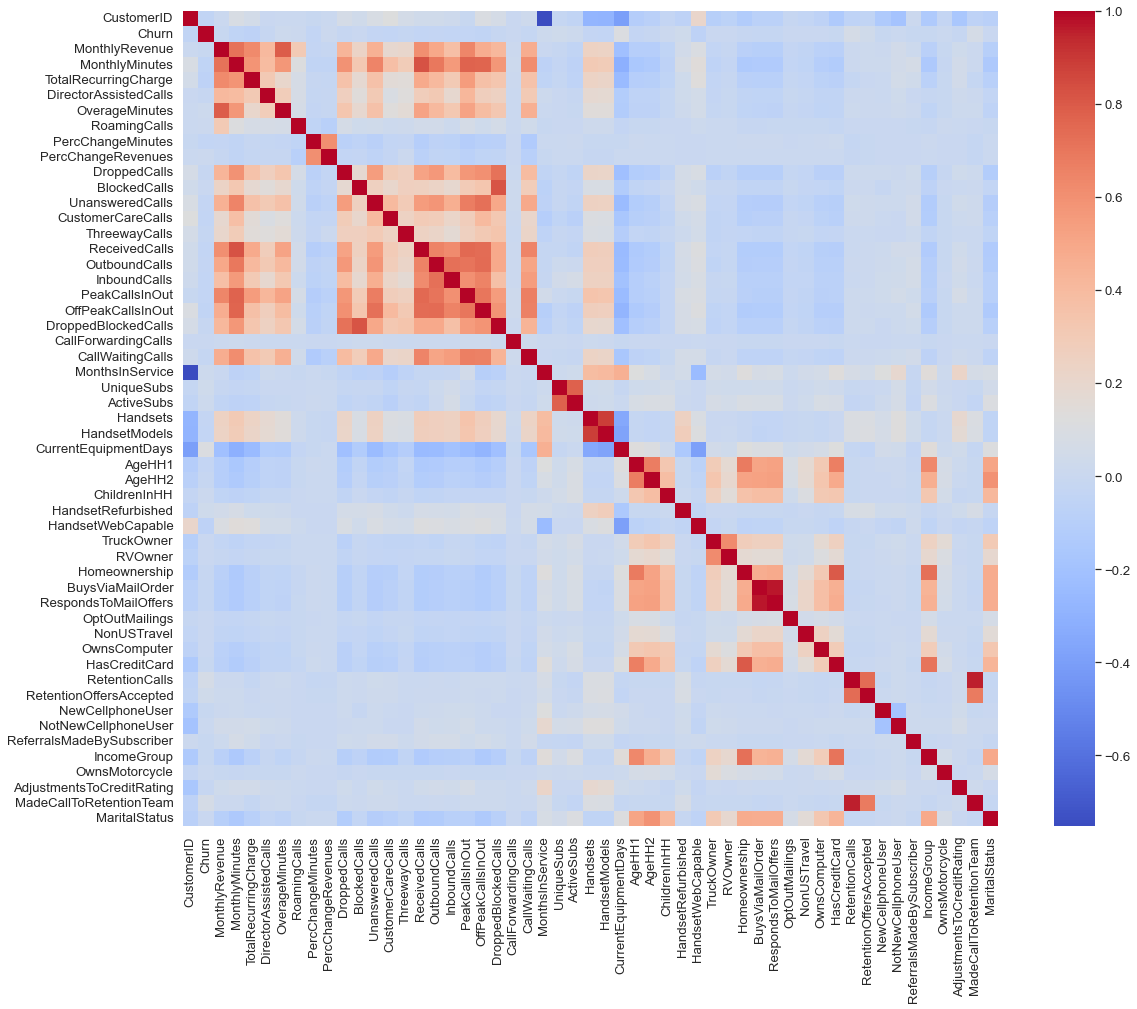

In [12]:
cor = train_df.corr()

plt.figure(figsize=(20, 15))

sns.heatmap(cor,square=True, cmap='coolwarm')

plt.show()

In [13]:
correlation = train_df.corr()['Churn']

# Sort the correlation values in descending order
correlation_sorted = correlation.sort_values(ascending=False)

negative_correlation_vars = correlation[correlation < 0].index

print(correlation_sorted)

Churn                        1.000000
CurrentEquipmentDays         0.103687
MadeCallToRetentionTeam      0.067393
RetentionCalls               0.065301
RetentionOffersAccepted      0.034953
UniqueSubs                   0.034522
HandsetRefurbished           0.029949
MonthsInService              0.018703
OverageMinutes               0.016427
ActiveSubs                   0.015515
PercChangeRevenues           0.011054
RoamingCalls                 0.010860
ChildrenInHH                 0.009562
OwnsMotorcycle               0.007295
NotNewCellphoneUser          0.006728
OptOutMailings               0.000102
CallForwardingCalls         -0.001449
OwnsComputer                -0.002046
NonUSTravel                 -0.002941
RVOwner                     -0.003454
MaritalStatus               -0.004666
TruckOwner                  -0.004818
BlockedCalls                -0.005530
NewCellphoneUser            -0.007695
HasCreditCard               -0.008618
ReferralsMadeBySubscriber   -0.010686
MonthlyReven

# Data Preprocessing

# Remove outliers

In [14]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# List of columns to consider for outlier removal
columns_to_check = sorted_columns_with_outliers

# Remove outliers using the IQR method
train_df_cleaned = remove_outliers_iqr(train_df, columns_to_check)

# Print the shape of the cleaned DataFrame to see how many outliers were removed
print("Original DataFrame shape:", train_df.shape)
print("Cleaned DataFrame shape:", train_df_cleaned.shape)

Original DataFrame shape: (51047, 58)
Cleaned DataFrame shape: (5302, 58)


In [15]:
#many unique number
train_df_cleaned['ServiceArea'].value_counts()

NYCBRO917    171
APCFCH703    116
HOUHOU281    114
NYCMAN917    111
DALDAL214    109
            ... 
DALCOM903      1
FLNSTK904      1
NMXDEL830      1
PITIND724      1
NMXFLA520      1
Name: ServiceArea, Length: 483, dtype: int64

In [16]:
train_df_cleaned.drop(['ServiceArea', 'CustomerID'], axis=1, inplace=True)

In [17]:
train_df_cleaned['CreditRating']=train_df_cleaned['CreditRating'].replace({"1-Highest":1, "2-High":2, "3-Good":3, "4-Medium":4, 
                                                           "5-Low":5, "6-VeryLow":6, "7-Lowest":7})
train_df_cleaned['PrizmCode']=train_df_cleaned['PrizmCode'].replace({"Suburban":1, "Town":2, "Rural":3, "Other":4})

train_df_cleaned['HandsetPrice']=train_df_cleaned['HandsetPrice'].replace({"30":30, "10":10, "80":80, "150":150, "300":300, "40":40, "200":200, 
                                                           "100":100, "130":130, "60":60, "400":400, "240":240, "250":250, 
                                                           "180":180, "500":500})

train_df_cleaned['Occupation']=train_df_cleaned['Occupation'].replace({"Professional":1, "Crafts":2, "Self":3, "Clerical":4, 
                                                       "Homemaker":5, "Retired":6, "Student": 7, "Other":8})


# SMOTE

In [18]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy = 1)

trainn = train_df_cleaned.drop('Churn', axis=1)
churn = train_df_cleaned['Churn']

smote_trainn, smote_churn = over.fit_resample(trainn, churn)

print('Before SMOTE:', Counter(churn))
print('After SMOTE:', Counter(smote_churn))

Before SMOTE: Counter({0: 3870, 1: 1432})
After SMOTE: Counter({1: 3870, 0: 3870})


# Modeling

In [19]:
X_train, X_test, y_train, y_test = train_test_split(smote_trainn, smote_churn, test_size=0.2, random_state=15)
scaler = StandardScaler()
Xs_train_scaled = scaler.fit_transform(X_train)
Xs_test_scaled = scaler.transform(X_test)

## Feature Scaling: Standard Scaler

Model: LogisticRegression
Test Accuracy:
[[469 318]
 [235 526]]
              precision    recall  f1-score   support

           0       0.67      0.60      0.63       787
           1       0.62      0.69      0.66       761

    accuracy                           0.64      1548
   macro avg       0.64      0.64      0.64      1548
weighted avg       0.65      0.64      0.64      1548


Model: DecisionTreeClassifier
Test Accuracy:
[[549 238]
 [226 535]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       787
           1       0.69      0.70      0.70       761

    accuracy                           0.70      1548
   macro avg       0.70      0.70      0.70      1548
weighted avg       0.70      0.70      0.70      1548


Model: RandomForestClassifier
Test Accuracy:
[[674 113]
 [168 593]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       787
           1       0.84      0.78  

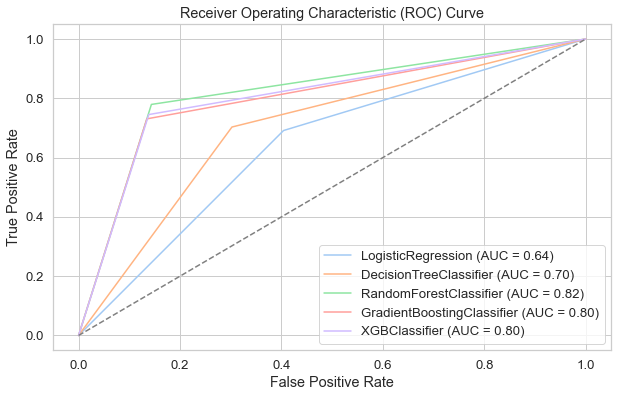

In [20]:
models = [
    LogisticRegression(random_state=15),
    DecisionTreeClassifier(random_state=15),
    RandomForestClassifier(n_estimators=300, criterion="gini", random_state=15, max_depth=100),
    GradientBoostingClassifier(random_state=15), 
    XGBClassifier(random_state=15)
]

model_names = []
accuracy_scores = []

plt.figure(figsize=(10, 6))

for model in models:
    model_names.append(model.__class__.__name__)

    Xs_test_scaled = scaler.transform(X_test)

    model.fit(Xs_train_scaled, y_train)
    y_pred = model.predict(Xs_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    print(f"Model: {model.__class__.__name__}")
    print(f"Test Accuracy:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()

    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.legend(loc='lower right')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


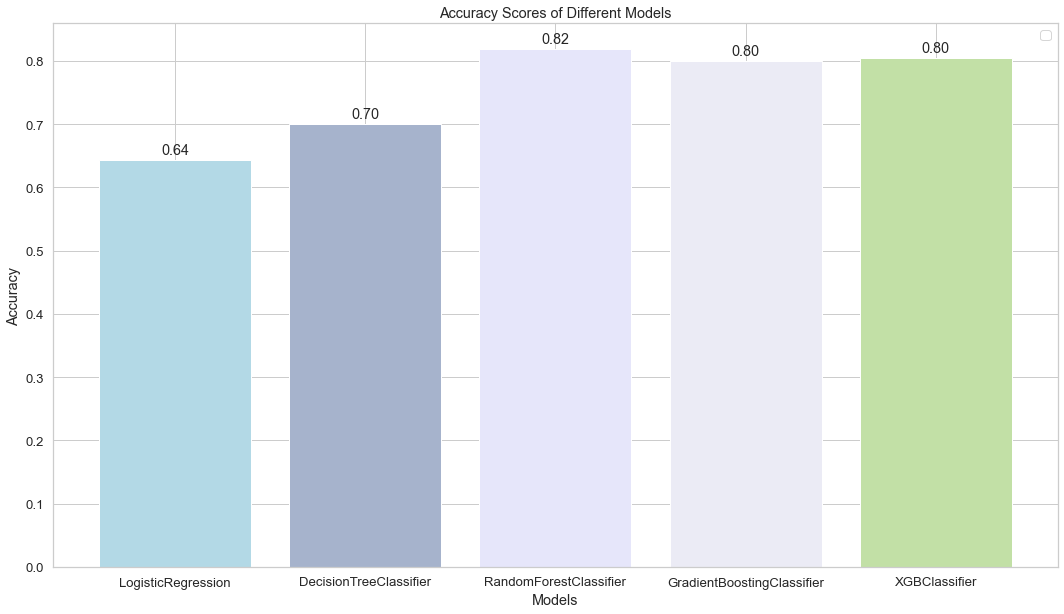

In [21]:
colors = ['#b3d9e6', '#a6b3cc', '#e6e6fa', '#ebebf5', '#c2e0a6']

plt.figure(figsize=(18, 10))
bars = plt.bar(model_names, accuracy_scores, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Different Models')


for bar, accuracy in zip(bars, accuracy_scores):
    plt.annotate(f'{accuracy:.2f}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')


overall_accuracy = accuracy_score(y_test, y_pred)
plt.legend()
plt.show()

# <center><div style="font-family: Trebuchet MS; background-color: #AEA6F1; color: #AED6F1; padding: 12px; line-height: 1;">Algorithm Results Table</div></center>
## <center><div style="font-family: Trebuchet MS; background-color: #89CFF0; color: #00008B; padding: 12px; line-height: 1;">Mean & Mode(SMOTE)</div></center>
||ML Algorithm|F1 Score (Accuracy)|
|-|-|-|
|1|LogisticRegressionClassifier|64%|
|2|DecisionTreeClassifier|70%|
|3|RandomForestClassifier|82%|
|4|GradientBoostingClassifier|80%|
|5|XGBoostClassifier|80%|

## <center><div style="font-family: Trebuchet MS; background-color: #AEA6F1; color: #AED6F1; padding: 12px; line-height: 1;">END</div></center>